In [39]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [15]:
#importing models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
#loading datasets
calories_data = pd.read_csv("calories.csv")
exercise_data = pd.read_csv("exercise.csv")

In [8]:
calories_data.tail()

,User_ID,Calories
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0
14999,11751526,98.0


In [9]:
exercise_data.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [6]:
exercise_data["Calories"] = calories_data["Calories"]

In [7]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
exercise_data["Gender"].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

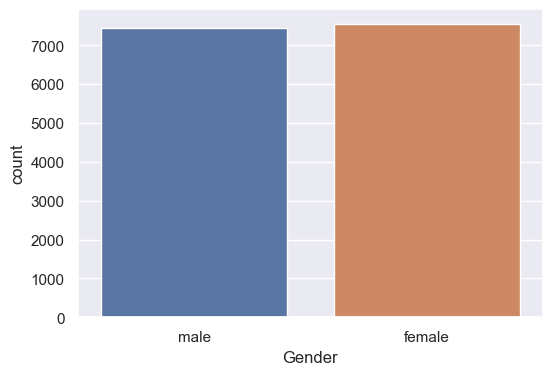

In [18]:
#plotting the categorical columns
sns.set()
plt.figure(figsize=(6,4))
sns.countplot(x = "Gender", data = exercise_data)
plt.show()

In [22]:
#label encoding
exercise_data["Gender"].replace(['male', 'female'], [0,1], inplace=True)

In [23]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [24]:
#since User_ID is not significant for this dataset
exercise_data.drop("User_ID", axis=1, inplace=True)

In [25]:
X = exercise_data.drop("Calories", axis=1)
Y= exercise_data["Calories"]

## Gridsearchcv for different regression models

In [26]:
def param_tuning(model, params):
    grid_cv = GridSearchCV(model, params, cv=5)
    grid_cv.fit(X,Y)
    print("Best Parameters: ", grid_cv.best_params_)
    print("Best score: ", grid_cv.best_score_)

In [27]:
# Linear Regression
params = {
    'fit_intercept':[True, False],
    'n_jobs':[1, 2, 4, 6]
}
param_tuning(LinearRegression(), params)

Best Parameters:  {'fit_intercept': True, 'n_jobs': 1}
Best score:  0.967152984018283


In [35]:
#RandomForestRegression
params = {
    'n_estimators':[1, 10, 50, 100],
    'max_depth':[1, 2, 4, 8]
}
param_tuning(RandomForestRegressor(random_state=42), params)

Best Parameters:  {'max_depth': 8, 'n_estimators': 100}
Best score:  0.9938476822639963


In [36]:
#decisiontreeRegressor
params = {
    'splitter':['best', 'random'],
    'max_depth':[1, 2, 4, 8]
}
param_tuning(DecisionTreeRegressor(random_state=42), params)

Best Parameters:  {'max_depth': 8, 'splitter': 'best'}
Best score:  0.9858235377889647


In [40]:
#train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [42]:
#using randomforestregressor
model = RandomForestRegressor(random_state=42, max_depth = 8, n_estimators = 100)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=8, random_state=42)

In [43]:
#Evaluation of training dataset
Y_train_pred = model.predict(X_train)
mse = mean_squared_error(Y_train, Y_train_pred)
rmse = np.sqrt(mse)
r2score = r2_score(Y_train, Y_train_pred)
print("MSE for training datasets: ", mse)
print("RMSE for training datasets: ", rmse)
print("R2Score for training datasets: ", r2score)

MSE for training datasets:  17.496606312093363
RMSE for training datasets:  4.182894489715628
R2Score for training datasets:  0.9954740403571002


In [44]:
#Evaluation of training dataset
Y_test_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_test_pred)
rmse = np.sqrt(mse)
r2score = r2_score(Y_test, Y_test_pred)
print("MSE for test datasets: ", mse)
print("RMSE for test datasets: ", rmse)
print("R2Score for test datasets: ", r2score)

MSE for test datasets:  23.243981172885977
RMSE for test datasets:  4.821201216801263
R2Score for test datasets:  0.9942405396058162
